In [6]:
#importar librerias
import numpy as np
from numpy import sin, cos, tan, arctan, pi, matmul,arange
import matplotlib.pyplot as plt
import random as rd
from random import randint, random, uniform

In [7]:
#datos
p = np.array([[0,0],[0,1],[1,0],[1,1]])
t = np.array([[1],[0],[0],[1]])

iteraciones = 10000
alfa = 1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [8]:
#funcion
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [9]:
#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
output_bias = np.random.uniform(size=(1, outputLayerNeurons))


print("W inicial capas ocultas: ", hidden_weights)
print("b inicial capas ocultas: ", hidden_bias)
print("w inicial capas de salida: ", output_weights)
print("b inicial capas de salida: ", output_bias)
#Training algorithm
for k in range(iteraciones):
    # Forward Propagation
    hidden_layer_activation = np.dot(p, hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    # Backpropagation
    error = t - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * alfa
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * alfa
    hidden_weights += p.T.dot(d_hidden_layer) * alfa
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * alfa

print("W final capas ocultas: ", hidden_weights)
print("b final capas ocultas: ", hidden_bias)
print("W final capas de salida: ", output_weights)
print("b final capas de salida: ", output_bias)

W inicial capas ocultas:  [[0.44552302 0.62093206]
 [0.66832188 0.1999658 ]]
b inicial capas ocultas:  [[0.2732957  0.09286556]]
w inicial capas de salida:  [[0.32065677]
 [0.33060959]]
b inicial capas de salida:  [[0.13100991]]
W final capas ocultas:  [[6.70261021 4.8367911 ]
 [6.68178672 4.83159579]]
b final capas ocultas:  [[-3.00643184 -7.41597224]]
W final capas de salida:  [[-10.30757395]
 [ 11.0060387 ]]
b final capas de salida:  [[4.80069487]]


W de la capa oculta:
[[6.70261021 4.8367911 ]
 [6.68178672 4.83159579]]
b de la capa oculta:
[[-3.00643184 -7.41597224]]
W de la capa de salida:
[[-10.30757395]
 [ 11.0060387 ]]
b de la capa de salida:
[[4.80069487]]


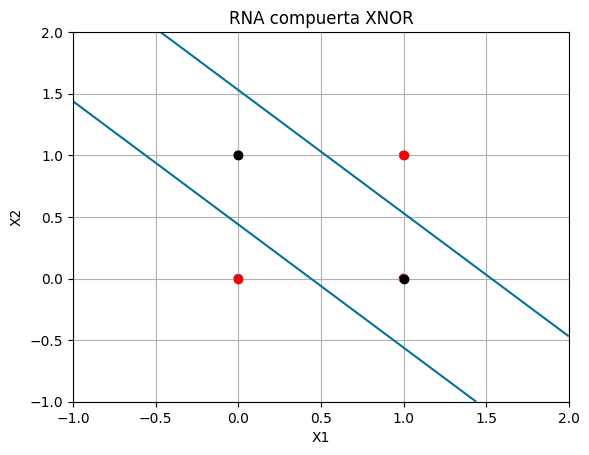

In [10]:
#graficas
# Obtener los valores mínimos y máximos para los datos de entrada
x_min, x_max = -1, 2
y_min, y_max = -1, 2

# Crear una malla de puntos para hacer la predicción en todo el espacio
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Obtener las predicciones de la red neuronal para los puntos de la malla
Z = np.round(sigmoid(np.dot(sigmoid(np.dot(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])), hidden_weights) + hidden_bias), output_weights) + output_bias))
Z = Z.reshape(xx.shape)

# Graficar el resultado de la predicción junto con los datos de entrada
plt.contour(xx, yy, Z, levels=[0.5], colors='xkcd:ocean blue')
plt.scatter(p[:, 0], p[:, 1], c=t.ravel(), cmap=plt.cm.Spectral)

# Agregar título y etiquetas de los ejes
plt.title('RNA compuerta XNOR')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot( [0,1],[1,0], "ko" ,[0,1],[0,1], "ro")
plt.axis([-1,2,-1,2])
plt.grid()

# Mostrar los pesos y el sesgo
print("W de la capa oculta:")
print(hidden_weights)
print("b de la capa oculta:")
print(hidden_bias)
print("W de la capa de salida:")
print(output_weights)
print("b de la capa de salida:")
print(output_bias)

# Mostrar la gráfica
plt.show()

